In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=pd.read_csv('movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
data.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


Data preprocessing has to be performed as there are NaN values in some rows

In [6]:
data.director_name.value_counts()

Steven Spielberg         26
Woody Allen              22
Martin Scorsese          20
Clint Eastwood           20
Ridley Scott             17
Steven Soderbergh        16
Spike Lee                16
Tim Burton               16
Renny Harlin             15
Oliver Stone             14
John Carpenter           13
Joel Schumacher          13
Ron Howard               13
Michael Bay              13
Robert Rodriguez         13
Sam Raimi                13
Robert Zemeckis          13
Barry Levinson           13
Richard Donner           12
Tony Scott               12
Peter Jackson            12
Wes Craven               12
Kevin Smith              12
Shawn Levy               12
Brian De Palma           12
Rob Cohen                11
Stephen Frears           11
Rob Reiner               11
Richard Linklater        11
Francis Ford Coppola     11
                         ..
Lance McDaniel            1
D.W. Griffith             1
David Robert Mitchell     1
Neil Mcenery-West         1
Alejandro Agresti   

In [8]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in data.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = data.columns.difference(str_list)   

In [10]:
movie_num = data[num_list]
#del movie # Get rid of movie df as we won't need it now
movie_num.head()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
0,1000.0,936.0,855.0,1.78,237000000.0,4834,0.0,178.0,0.0,760505847.0,7.9,33000,723.0,3054.0,886204,2009.0
1,40000.0,5000.0,1000.0,2.35,300000000.0,48350,563.0,169.0,0.0,309404152.0,7.1,0,302.0,1238.0,471220,2007.0
2,11000.0,393.0,161.0,2.35,245000000.0,11700,0.0,148.0,1.0,200074175.0,6.8,85000,602.0,994.0,275868,2015.0
3,27000.0,23000.0,23000.0,2.35,250000000.0,106759,22000.0,164.0,0.0,448130642.0,8.5,164000,813.0,2701.0,1144337,2012.0
4,131.0,12.0,NaN,NaN,NaN,143,131.0,NaN,0.0,NaN,7.1,0,NaN,NaN,8,NaN


In [12]:
movie_num = movie_num.fillna(value=0, axis=1)
movie_num.head()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
0,1000.0,936.0,855.0,1.78,237000000.0,4834,0.0,178.0,0.0,760505847.0,7.9,33000,723.0,3054.0,886204,2009.0
1,40000.0,5000.0,1000.0,2.35,300000000.0,48350,563.0,169.0,0.0,309404152.0,7.1,0,302.0,1238.0,471220,2007.0
2,11000.0,393.0,161.0,2.35,245000000.0,11700,0.0,148.0,1.0,200074175.0,6.8,85000,602.0,994.0,275868,2015.0
3,27000.0,23000.0,23000.0,2.35,250000000.0,106759,22000.0,164.0,0.0,448130642.0,8.5,164000,813.0,2701.0,1144337,2012.0
4,131.0,12.0,0.0,0.00,0.0,143,131.0,0.0,0.0,0.0,7.1,0,0.0,0.0,8,0.0


In [13]:
X = movie_num.values
# Data Normalization: feature scaling
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

<img src="1.png">

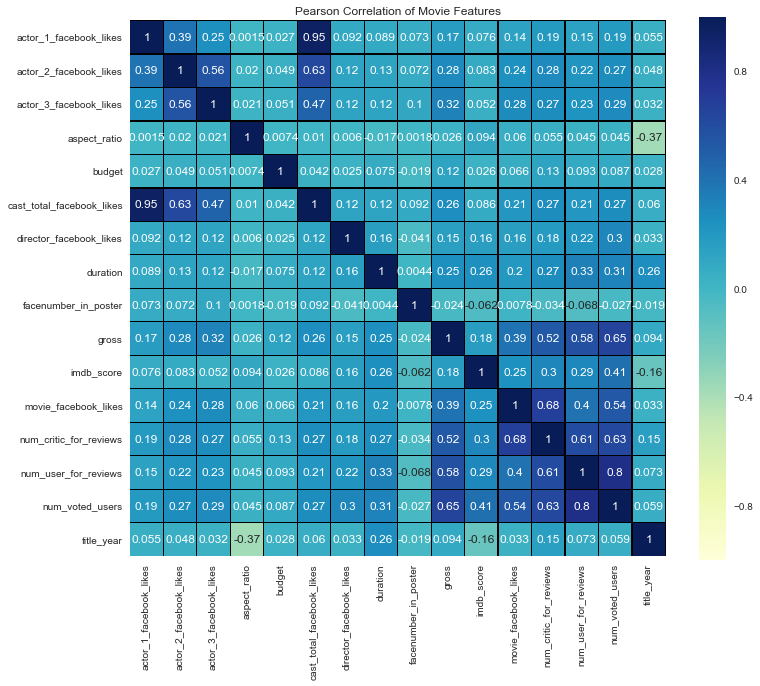

In [14]:
import seaborn as sns
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sns.heatmap(movie_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

The heatmap basically gives the correlation between the features

* As we can see from the heatmap, there are regions (features) where we can see quite positive linear correlations amongst each other, given the darker shade of the colours - top left-hand corner and bottom right quarter. This is a good sign as it means we may be able to find linearly correlated features for which we can perform PCA projections on.


In [15]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T) # calculating sigma (covariance matrix)
eig_vals, eig_vecs = np.linalg.eig(cov_mat) # similar to svd (singular vecotr decomposition) in matlab

<img src="2.png">

In [16]:
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ -2.26537959e-01  -4.84512912e-01  -6.25526309e-01  -2.54850556e-02
    1.22040196e-02   1.59700503e-03  -8.20455669e-02   1.30231004e-01
    8.30152178e-02   3.08599418e-01  -4.61526260e-02   1.55848740e-01
    2.46832873e-01   3.08665098e-01  -1.14803024e-01  -1.50896233e-02]
 [ -2.69092218e-01  -3.58700909e-01  -1.69725942e-01  -3.26942578e-02
    6.56390741e-03   7.60291496e-02   4.26742551e-01  -5.89564365e-01
   -1.85998522e-01  -1.13765628e-01   3.76948009e-02  -1.98526048e-01
   -2.91726864e-01  -2.37168216e-01   6.96196443e-03   6.12781355e-02]
 [ -2.55649644e-01  -2.65931877e-01  -1.03031472e-01  -3.11417767e-02
   -7.88044652e-03  -7.91577385e-02  -4.83562643e-01   4.19817878e-01
    2.89276914e-02  -2.94879633e-01   8.93664485e-02  -2.25155107e-01
   -3.57162214e-01  -3.88802842e-01   7.96932700e-02   6.61419990e-02]
 [ -2.51814254e-02   4.47621437e-02  -7.90001731e-04  -6.09901306e-01
    1.20637428e-02   8.09157900e-02  -1.54281997e-02   8.08988008e-02
   

In [17]:
# using svd directly in python
u,s,v=np.linalg.svd(X_std.T)

<img src="3.png">

In [18]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

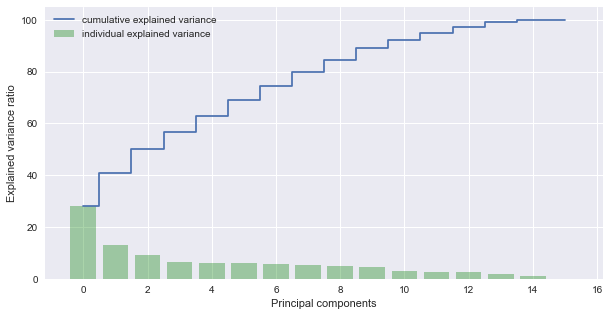

In [19]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(16), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(16), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

From the plot above, it can be seen that approximately 95% of the variance can be explained with the 12 principal components. 
Therefore for the purposes of this notebook, let's implement PCA with 12 components ( although to ensure that we are not excluding useful information, one should really go for 99% or greater variance level which corresponds to about 13 components).


<img src="4.png">

In [23]:
s

array([ 150.44370085,  102.01238998,   86.16143478,   73.29550778,
         70.8981153 ,   69.42644789,   67.20697502,   64.34248757,
         62.29528352,   60.86646266,   49.34325465,   46.17042575,
         45.14426579,   37.50358183,   27.27861555,    2.8798222 ])

In [24]:
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 


In [25]:
pca = PCA(n_components=12)
x_12d = pca.fit_transform(X_std)

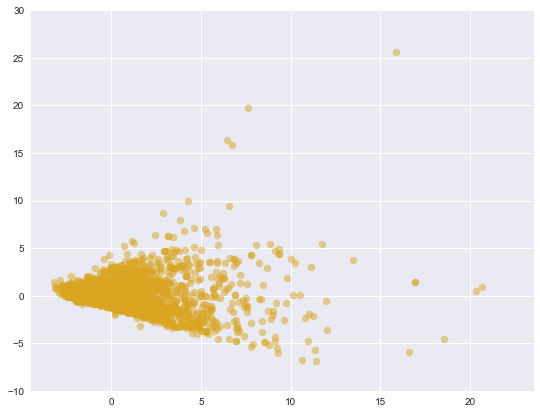

In [26]:
plt.figure(figsize = (9,7))
plt.scatter(x_12d[:,0],x_12d[:,1], c='goldenrod',alpha=0.5)
plt.ylim(-10,30)
plt.show()





As a quick aside, my aim (or hope) in carrying out this quick and dirty plotting is to see if we can observe distinct clusters already present within the plots which would be able to tell us if our PCA-transformed data can indeed be linearly separable into different groups for later use as our new features.

However from the 2D plot above of the first 2 PCA projections, the first visual impression is that there does not seem to be any discernible clusters. However keeping in mind that our PCA projections contain another 9 components, perhaps looking at plots with the other components may be fruitful. For now, let us assume that will be trying a 3-cluster (just as a naive guess) KMeans to see if we are able to visualise any distinct clusters.


A simple KMeans will now be applied to the PCA projection data. Each cluster will be visualised with a different colour so hopefully we will be able to pick out clusters by eye.

To start off, we set up a KMeans clustering with sklearn's KMeans() and call the "fit_predict" method to compute cluster centers and predict cluster indices for the first and third PCA projections (to see if we can observe any appreciable clusters). We then define our own colour scheme and plot the scatter diagram as follows:


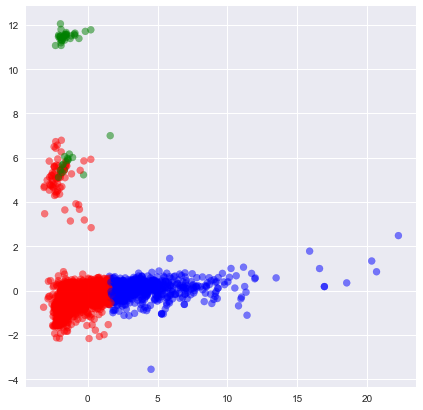

In [27]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_12d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_12d[:,0],x_12d[:,2], c= label_color, alpha=0.5) 
plt.show()

The algorithm is not tuned properly it has to be tuned using GridsearchCV

C:\apps\sc\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\apps\sc\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\apps\sc\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


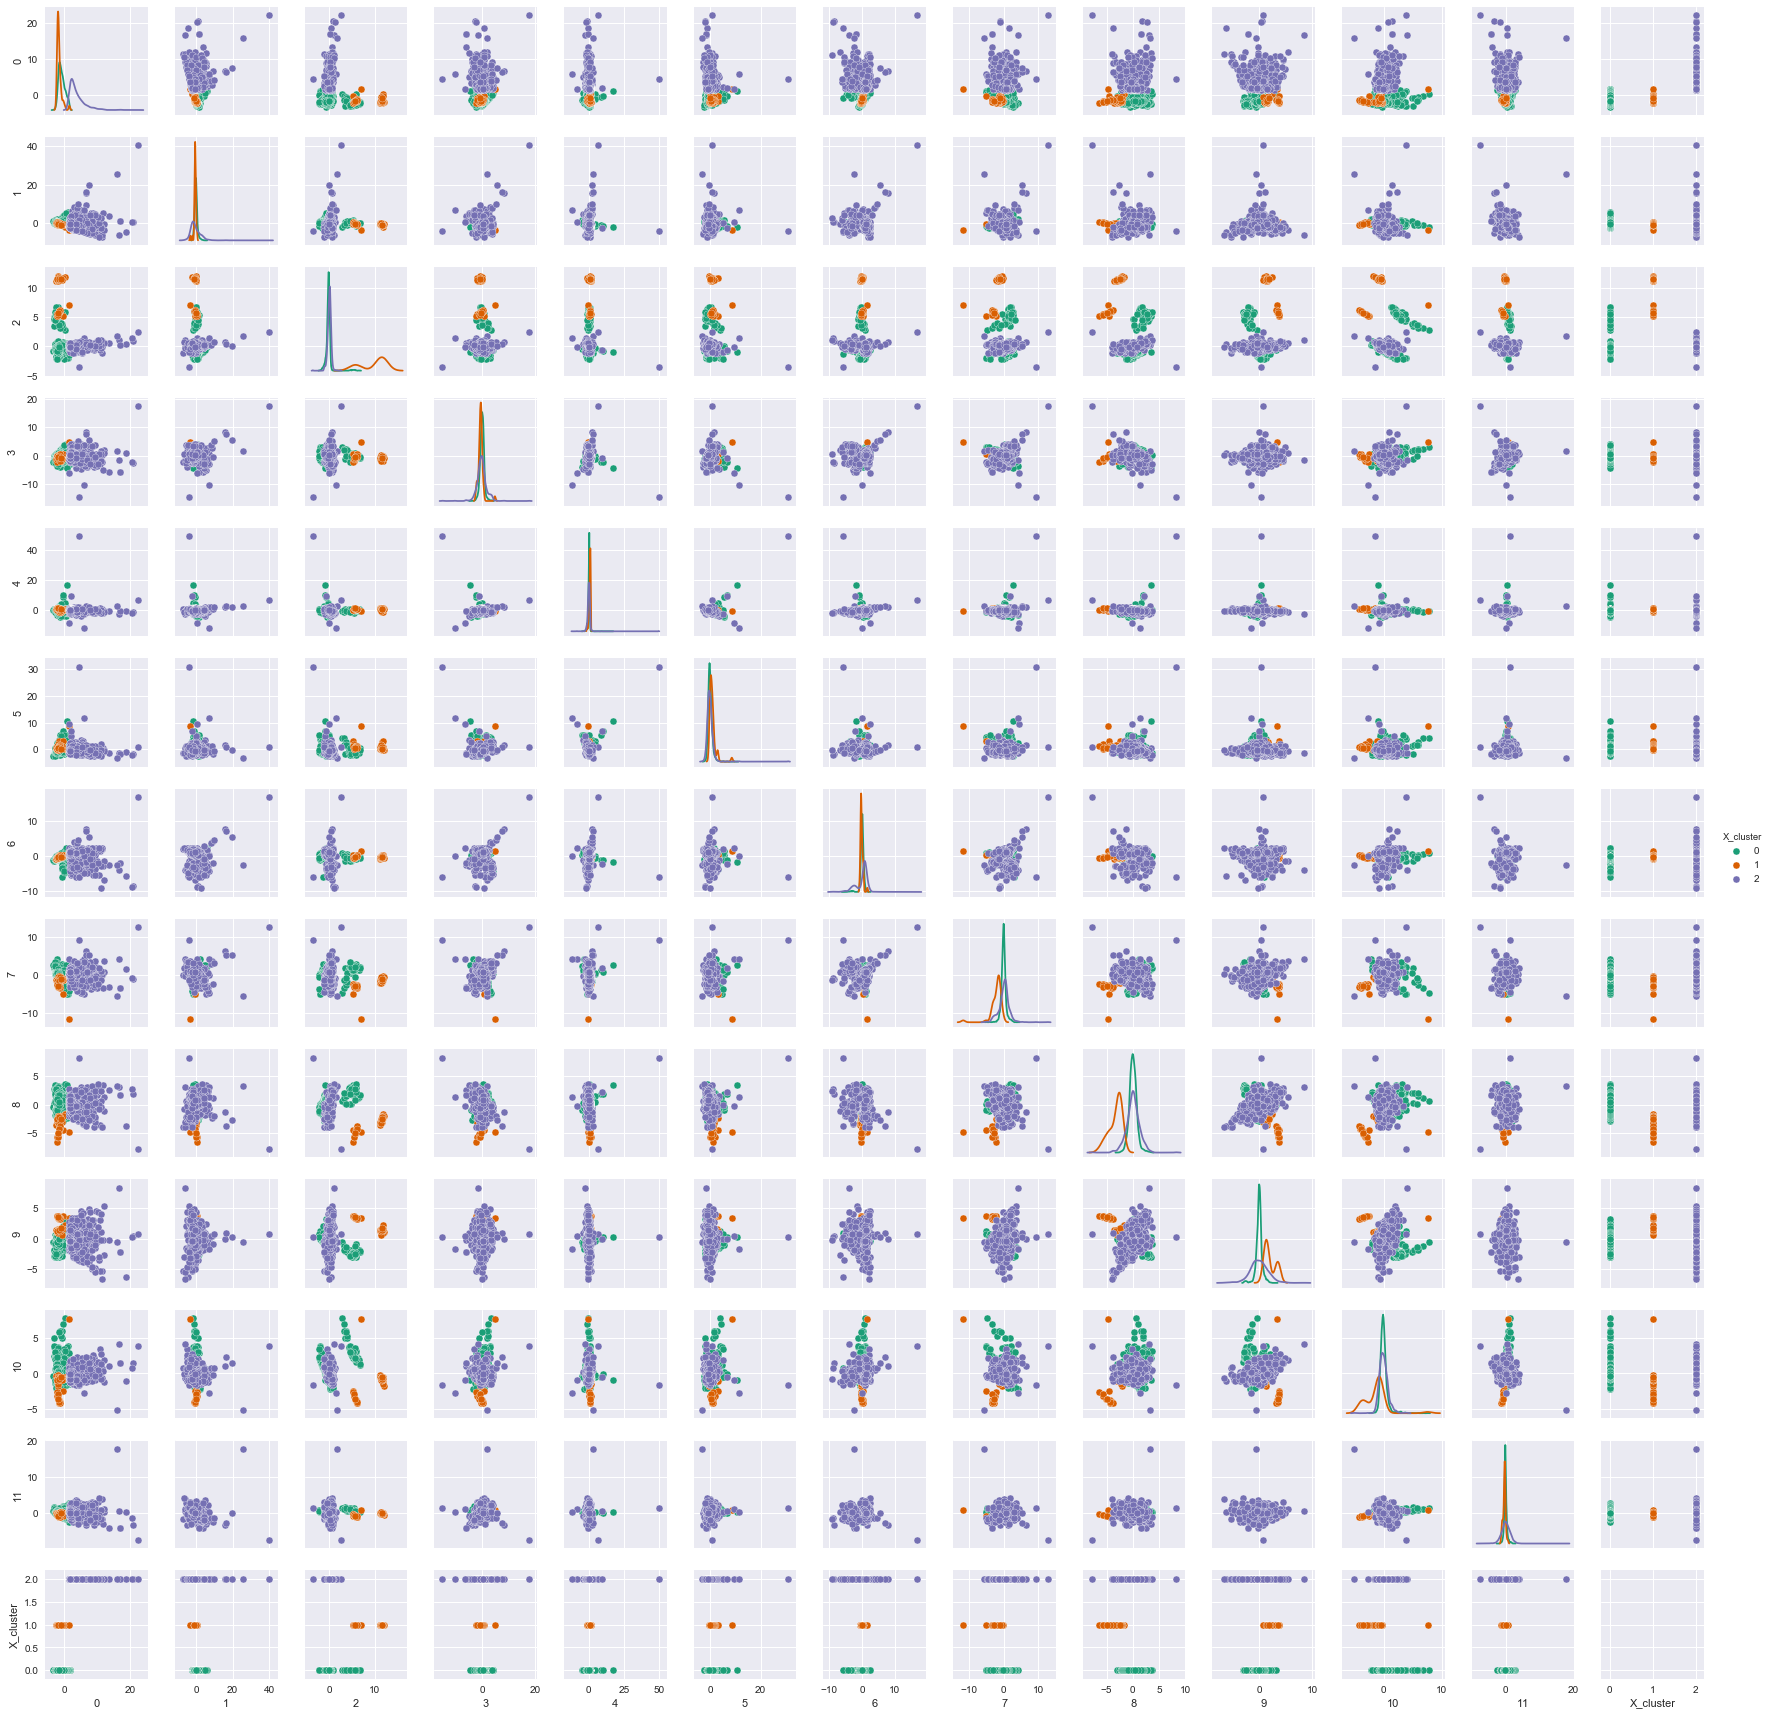

In [28]:
# Create a temp dataframe from our PCA projection data "x_9d"
df = pd.DataFrame(x_12d)
#df = df[[0,1,2]] # only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered

# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

<img src="5.png">

<img src="6.png">

<img src="7.png">